In [16]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [17]:
players=pd.read_csv('players_22.csv')

In [18]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


List of features that we want to cluster based on

In [19]:
features=["overall",'potential','value_eur','wage_eur','age']

In [20]:
# dropping rows if there are null values in feature columns
players=players.dropna(subset=features)

In [21]:
data=players[features].copy()

In [22]:
data

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


1. Scale the data.
2. Initialize the random centroids.
3. Label each data point.
4. Updata each centroid
5. Repeat steps 3 and 4, until centroids stop changing.

In [23]:
9# min max scaling
# so that every value in each column would be in range from 1 to 10.

data=(data-data.min())/(data.max()-data.min())*9+1

In [24]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [25]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


In [28]:
# initialize random centroids
def random_centroids(data,k):
    centroids=[]
    for i in range(k):
        centroid=data.apply(lambda x:float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1) # returns a dataframe of random centroids


In [29]:
centroids=random_centroids(data,5)

In [30]:
centroids

,0,1,2,3,4
overall,2.369565,2.956522,4.326087,5.500000,4.521739
potential,6.869565,4.130435,7.065217,4.130435,5.500000
value_eur,1.055255,1.440325,1.023939,1.023939,1.026259
wage_eur,4.077253,2.789700,1.010300,1.038627,1.038627
age,5.000000,3.333333,4.333333,4.333333,5.333333


In [35]:
distances=centroids.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))

In [36]:
distances

,0,1,2,3,4
0,10.437740,12.025423,11.234545,11.719601,11.385536
1,10.419488,11.677644,10.863260,11.337036,11.058358
2,9.169395,10.869388,9.794180,10.283719,9.849683
3,10.397272,11.462547,10.820555,11.265581,11.082567
4,11.255941,12.510957,12.196229,12.588098,12.397752
...,...,...,...,...,...
19234,6.570755,3.709026,6.546176,5.338368,5.758490
19235,5.971571,3.221278,5.778335,5.203305,5.475856
19236,6.232286,3.390223,6.145404,5.182435,5.529791
19237,5.845233,3.155242,5.640894,5.162684,5.387764


In [38]:
# to get the index of minimum value in each row
distances.idxmin(axis=1) # tells us which cluster each player belonging to

0        0
1        0
2        0
3        0
4        0
        ..
19234    1
19235    1
19236    1
19237    1
19238    1
Length: 19165, dtype: int64

In [39]:
def get_labels(data,centroids):
    distances=centroids.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [40]:
labels=get_labels(data,centroids)

In [41]:
labels

0        0
1        0
2        0
3        0
4        0
        ..
19234    1
19235    1
19236    1
19237    1
19238    1
Length: 19165, dtype: int64

In [42]:
labels.value_counts()

4    5993
2    5599
3    3915
1    3617
0      41
dtype: int64

In [50]:
# geemetric mean of all data in each cluster and get the centroids and form clusters again
def new_centroids(data,labels):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [45]:
from sklearn.decomposition import PCA # to visualize the clusters
import matplotlib.pyplot as plt
from IPython.display import clear_output # clears the output each time we plot a new graph

In [54]:
def plot_clusters(data,labels,centroids,iteration):
    pca=PCA(n_components=2) # we pass several columns and turn it to 2 columns
    data_2d=pca.fit_transform(data)
    centroids_2d=pca.transform(centroids.T) # pca model expects columns as features and rows as clusters
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
    plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()

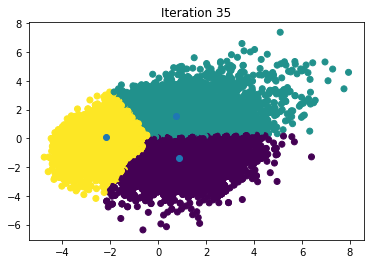

In [55]:
max_iterations=100
k=3

iteration=1
old_centroid=pd.DataFrame()
centroids=random_centroids(data,k)

while iteration < max_iterations and not centroids.equals(old_centroid):
    old_centroid=centroids
    
    labels=get_labels(data,centroids)
    centroids=new_centroids(data,labels)
    plot_clusters(data,labels,centroids,iteration)
    iteration+=1

In [56]:
centroids

,0,1,2
overall,4.784633,5.806043,3.206838
potential,4.506962,6.497993,4.928473
value_eur,1.044980,1.285501,1.026614
wage_eur,1.118904,1.420001,1.028505
age,5.472247,3.596161,2.518708


In [59]:
# cluster 1 represents star players from the centroids value_eur, wage_eur is high for cluster 1
players[labels==1]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13245,261025,https://sofifa.com/player/261025/dane-scarlett...,D. Scarlett,Dane Pharrell Scarlett,ST,63,86,1500000.0,3000.0,17,...,36+2,36+2,36+2,39+2,15+2,https://cdn.sofifa.net/players/261/025/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
13256,261374,https://sofifa.com/player/261374/lewis-bate/22...,L. Bate,Lewis Bate,"CM, CDM",63,83,1300000.0,5000.0,18,...,56+2,56+2,56+2,60+2,14+2,https://cdn.sofifa.net/players/261/374/22_120.png,https://cdn.sofifa.net/teams/8/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
13351,264110,https://sofifa.com/player/264110/javier-llabre...,Llabrés,Javier Llabrés Exposito,"LM, LW, RW",63,81,1200000.0,3000.0,19,...,38+2,38+2,38+2,48+2,16+2,https://cdn.sofifa.net/players/264/110/22_120.png,https://cdn.sofifa.net/teams/453/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/es.png
14144,258171,https://sofifa.com/player/258171/hannibal-mejb...,H. Mejbri,Hannibal Mejbri,"CAM, CM",62,84,1300000.0,6000.0,18,...,54+2,54+2,54+2,58+2,14+2,https://cdn.sofifa.net/players/258/171/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/tn.png


In [61]:
from sklearn.cluster import KMeans

In [62]:
kmeans=KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [63]:
centroids=kmeans.cluster_centers_

In [65]:
pd.DataFrame(centroids,columns=features).T

,0,1,2
overall,4.801187,3.599859,6.231126
potential,4.504153,5.205869,6.623939
value_eur,1.040026,1.035792,1.413744
wage_eur,1.112969,1.039947,1.657115
age,5.609176,2.712386,4.139561
